In [1]:
from kedro.io import DataCatalog
import pandas as pd

In [2]:
data = catalog.load("raw_data")


[02/22/23 13:35:22] INFO     Loading data from 'raw_data' (CSVDataSet)...                       ]8;id=808002;file:///home/thiagocesar/desafiods/venv/lib/python3.8/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=660128;file:///home/thiagocesar/desafiods/venv/lib/python3.8/site-packages/kedro/io/data_catalog.py#343\343]8;;\

In [3]:
data.head()

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
1,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77
2,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19
3,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5
4,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12


In [4]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LogisticRegression,Lasso,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import metrics
from scipy.stats import zscore
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet

In [5]:
#Alteração do tipo da data para melhor análise

data['Date']=pd.to_datetime(data['time']).dt.date
data['time'] = pd.to_datetime(data['time']).dt.time
data.head()

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates,Date
0,0,20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,813743,428546,PS,0,38.29,40.22,147993,94,106,2019-10-06
1,0,20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77,2019-10-06
2,0,20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,813743,428546,B.E.,0,6.81,7.15,26307,16,19,2019-10-06
3,0,20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5,2019-10-06
4,0,20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12,2019-10-06


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

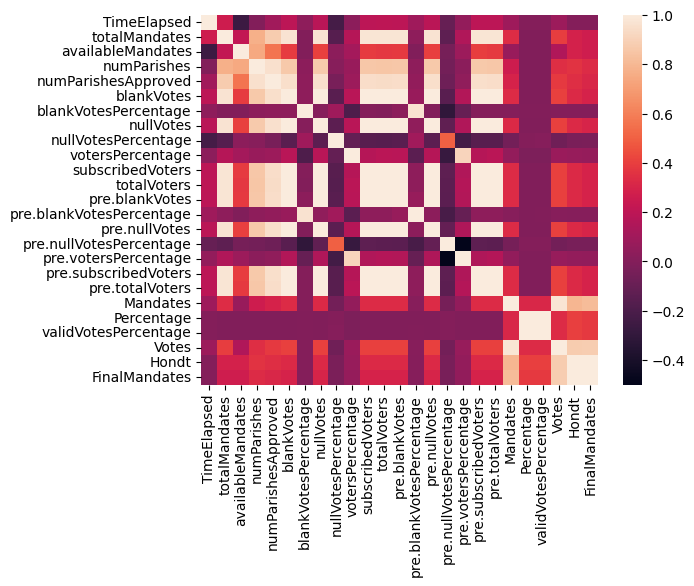

In [7]:
sns.heatmap(data.corr())

In [8]:
data = catalog.load("raw_data")

[02/22/23 13:35:27] INFO     Loading data from 'raw_data' (CSVDataSet)...                       ]8;id=45770;file:///home/thiagocesar/desafiods/venv/lib/python3.8/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=143468;file:///home/thiagocesar/desafiods/venv/lib/python3.8/site-packages/kedro/io/data_catalog.py#343\343]8;;\

In [9]:
data.dtypes

TimeElapsed                   int64
time                         object
territoryName                object
totalMandates                 int64
availableMandates             int64
numParishes                   int64
numParishesApproved           int64
blankVotes                    int64
blankVotesPercentage        float64
nullVotes                     int64
nullVotesPercentage         float64
votersPercentage            float64
subscribedVoters              int64
totalVoters                   int64
pre.blankVotes                int64
pre.blankVotesPercentage    float64
pre.nullVotes                 int64
pre.nullVotesPercentage     float64
pre.votersPercentage        float64
pre.subscribedVoters          int64
pre.totalVoters               int64
Party                        object
Mandates                      int64
Percentage                  float64
validVotesPercentage        float64
Votes                         int64
Hondt                         int64
FinalMandates                 int64
dtype: object

In [10]:
print(data.isnull().sum())

TimeElapsed                 0
time                        0
territoryName               0
totalMandates               0
availableMandates           0
numParishes                 0
numParishesApproved         0
blankVotes                  0
blankVotesPercentage        0
nullVotes                   0
nullVotesPercentage         0
votersPercentage            0
subscribedVoters            0
totalVoters                 0
pre.blankVotes              0
pre.blankVotesPercentage    0
pre.nullVotes               0
pre.nullVotesPercentage     0
pre.votersPercentage        0
pre.subscribedVoters        0
pre.totalVoters             0
Party                       0
Mandates                    0
Percentage                  0
validVotesPercentage        0
Votes                       0
Hondt                       0
FinalMandates               0
dtype: int64


In [11]:
data.corr()['FinalMandates']

TimeElapsed                -0.001007
totalMandates               0.264117
availableMandates           0.266764
numParishes                 0.329009
numParishesApproved         0.312177
blankVotes                  0.295583
blankVotesPercentage       -0.001195
nullVotes                   0.298663
nullVotesPercentage        -0.029659
votersPercentage            0.061048
subscribedVoters            0.295555
totalVoters                 0.294490
pre.blankVotes              0.294866
pre.blankVotesPercentage    0.005716
pre.nullVotes               0.297482
pre.nullVotesPercentage    -0.038686
pre.votersPercentage        0.050450
pre.subscribedVoters        0.296428
pre.totalVoters             0.295169
Mandates                    0.814370
Percentage                  0.383086
validVotesPercentage        0.382744
Votes                       0.882502
Hondt                       0.994480
FinalMandates               1.000000
Name: FinalMandates, dtype: float64

In [12]:
#Entendendo os dados
cols=["territoryName","Party"]
for i in cols:
    print("Number of unique values in ", i ," are : ",len(data[i].unique()), " : " ,data[i].unique())

Number of unique values in  territoryName  are :  21  :  ['Território Nacional' 'Aveiro' 'Beja' 'Braga' 'Bragança' 'Castelo Branco'
 'Coimbra' 'Évora' 'Faro' 'Guarda' 'Leiria' 'Lisboa' 'Madeira'
 'Portalegre' 'Porto' 'Santarém' 'Setúbal' 'Viana do Castelo' 'Vila Real'
 'Viseu' 'Açores']
Number of unique values in  Party  are :  21  :  ['PS' 'PPD/PSD' 'B.E.' 'CDS-PP' 'PCP-PEV' 'PAN' 'CH' 'R.I.R.' 'PCTP/MRPP'
 'A' 'L' 'IL' 'JPP' 'NC' 'PDR' 'PNR' 'PURP' 'PPM' 'MPT' 'PTP' 'MAS']


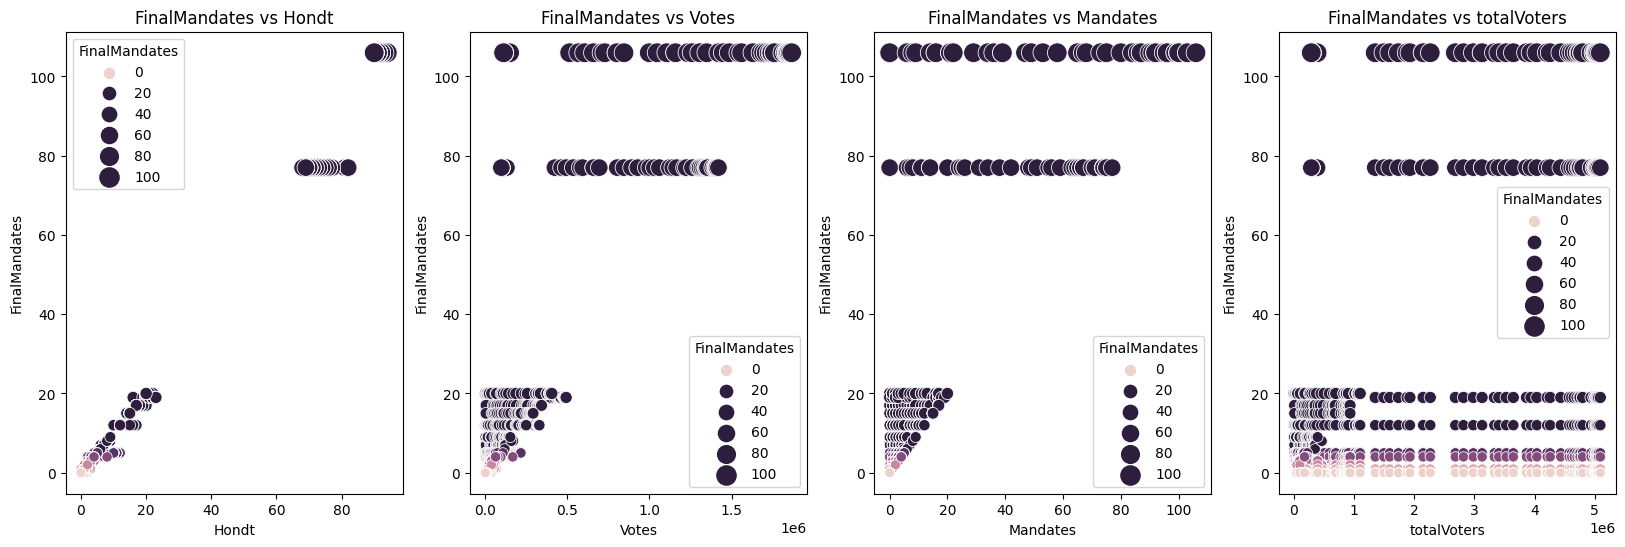

In [13]:
#Traçando diferentes variáveis em relação à variável de destino - Mandato final para encontrar a melhor correlação
cols=["Hondt","Votes","Mandates","totalVoters"]

fig, axes = plt.subplots(nrows=1,ncols=4,figsize=[20,6])
for i in range(0,len(cols)):
    axes[i]=sns.scatterplot( x= cols[i], y="FinalMandates", data = data ,hue="FinalMandates", size = "FinalMandates", 
                            sizes=(50,200), hue_norm=(0, 6),cmap="accent",ax=axes[i])
    axes[i].set_title("FinalMandates vs "+cols[i])

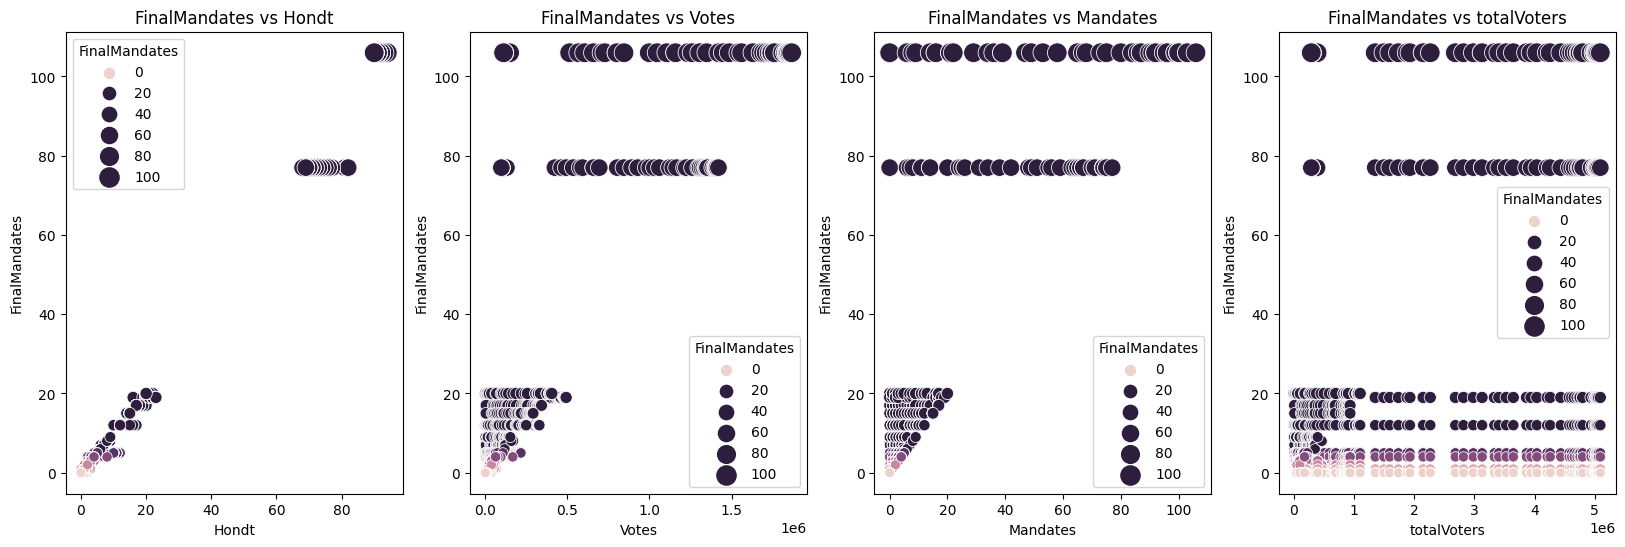

In [14]:
#Plotting different variables against target variable-Final mandate to find the best correlation
cols=["Hondt","Votes","Mandates","totalVoters"]

fig, axes = plt.subplots(nrows=1,ncols=4,figsize=[20,6])
for i in range(0,len(cols)):
    axes[i]=sns.scatterplot( x= cols[i], y="FinalMandates", data = data ,hue="FinalMandates", size = "FinalMandates",    sizes=(50,200), hue_norm=(0, 6),cmap="accent",ax=axes[i])
    axes[i].set_title("FinalMandates vs "+cols[i])

In [15]:
#Reduzindo a dimensionalidade reduzindo fatores correlacionados
cols_grp1=['totalMandates','numParishesApproved','blankVotes','nullVotes','subscribedVoters','totalVoters',
           'pre.blankVotes','pre.nullVotes','pre.subscribedVoters','pre.totalVoters','Percentage','Mandates',
           'pre.blankVotesPercentage','pre.votersPercentage']
cols_grp2=["Votes","Hondt"]
#Primeiro escalonamento utilizando standardscalar
df1 = data[cols_grp1]
df2=data[cols_grp2]
#Padronizando o valor de x usando standardscalar para tornar os dados normalmente distribuídos
sc = StandardScaler()
a = sc.fit_transform(df1)
df_1 = pd.DataFrame(a,columns=df1.columns)
b = sc.fit_transform(df2)
df_2 = pd.DataFrame(b,columns=df2.columns)

In [17]:
# Componentes principais de Análise
pca = PCA(n_components=1)
new_var1 = pca.fit_transform(df_1)
new_var2=pca.fit_transform(df_2)

# updating dataframe 
df_new = pd.concat((data, pd.DataFrame(new_var1)), axis=1)
df_new.rename({0: 'PCA_1'}, axis=1, inplace = True)
df_new.drop(cols_grp1, axis=1, inplace=True)
df_new = df_new = pd.concat((df_new, pd.DataFrame(new_var2)), axis=1)
df_new.rename({0: 'PCA_2'}, axis=1, inplace = True)
df_new.drop(cols_grp2, axis=1, inplace=True)
df_new.head()

,TimeElapsed,time,territoryName,availableMandates,numParishes,blankVotesPercentage,nullVotesPercentage,votersPercentage,pre.nullVotesPercentage,Party,validVotesPercentage,FinalMandates,PCA_1,PCA_2
0,0,2019-10-06 20:10:02,Território Nacional,226,3092,2.5,2.3,51.36,1.91,PS,40.22,106,0.508012,11.438592
1,0,2019-10-06 20:10:02,Território Nacional,226,3092,2.5,2.3,51.36,1.91,PPD/PSD,34.95,77,0.508034,9.830850
2,0,2019-10-06 20:10:02,Território Nacional,226,3092,2.5,2.3,51.36,1.91,B.E.,7.15,19,0.508147,1.750582
3,0,2019-10-06 20:10:02,Território Nacional,226,3092,2.5,2.3,51.36,1.91,CDS-PP,5.14,5,0.508155,1.245075
4,0,2019-10-06 20:10:02,Território Nacional,226,3092,2.5,2.3,51.36,1.91,PCP-PEV,4.83,12,0.508156,1.123863


In [19]:
#Combinação de variáveis em dois grupos PCA1 e PCA2
df=df_new

In [20]:
#Codificação de rótulo para variável numérica
obj_col =[]
for i in df.columns:
    if df[i].dtypes=="O":
        obj_col.append(i)
obj_col

['time', 'territoryName', 'Party']

In [21]:
le = LabelEncoder()
for i in obj_col:
    df[i]=pd.DataFrame(le.fit_transform(df[i]))
df.head()

,TimeElapsed,time,territoryName,availableMandates,numParishes,blankVotesPercentage,nullVotesPercentage,votersPercentage,pre.nullVotesPercentage,Party,validVotesPercentage,FinalMandates,PCA_1,PCA_2
0,0,0,16,226,3092,2.5,2.3,51.36,1.91,17,40.22,106,0.508012,11.438592
1,0,0,16,226,3092,2.5,2.3,51.36,1.91,15,34.95,77,0.508034,9.830850
2,0,0,16,226,3092,2.5,2.3,51.36,1.91,1,7.15,19,0.508147,1.750582
3,0,0,16,226,3092,2.5,2.3,51.36,1.91,2,5.14,5,0.508155,1.245075
4,0,0,16,226,3092,2.5,2.3,51.36,1.91,11,4.83,12,0.508156,1.123863


In [22]:
#Checando os outliers
df.describe()

,TimeElapsed,time,territoryName,availableMandates,numParishes,blankVotesPercentage,nullVotesPercentage,votersPercentage,pre.nullVotesPercentage,Party,validVotesPercentage,FinalMandates,PCA_1,PCA_2
count,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,2.164300e+04,2.164300e+04
mean,133.146052,26.629210,10.116851,11.499284,309.956013,2.621629,1.961471,51.983722,1.777442,10.096521,5.207232,1.126138,-2.101129e-17,1.838488e-17
std,77.651193,15.530239,5.985225,31.738783,659.055911,0.795289,0.375250,4.854380,0.388798,6.129654,10.881108,6.872644,3.160511e+00,1.368482e+00
min,0.000000,0.000000,0.000000,0.000000,54.000000,0.530000,1.340000,35.980000,1.140000,0.000000,0.020000,0.000000,-1.410571e+00,-2.469153e-01
25%,65.000000,13.000000,5.000000,0.000000,75.000000,2.230000,1.720000,50.290000,1.520000,4.000000,0.230000,0.000000,-1.049483e+00,-2.451153e-01
50%,135.000000,27.000000,10.000000,3.000000,147.000000,2.640000,1.870000,53.130000,1.690000,11.000000,0.650000,0.000000,-8.725745e-01,-2.407407e-01
75%,200.000000,40.000000,15.000000,9.000000,242.000000,2.980000,2.230000,54.550000,1.970000,15.000000,3.160000,0.000000,-4.223625e-01,-2.014299e-01
max,265.000000,53.000000,20.000000,226.000000,3092.000000,5.460000,3.350000,59.870000,3.120000,20.000000,51.420000,106.000000,2.066291e+01,2.404020e+01


TimeElapsed                   AxesSubplot(0.125,0.747241;0.133621x0.132759)
time                       AxesSubplot(0.285345,0.747241;0.133621x0.132759)
territoryName               AxesSubplot(0.44569,0.747241;0.133621x0.132759)
availableMandates          AxesSubplot(0.606034,0.747241;0.133621x0.132759)
numParishes                AxesSubplot(0.766379,0.747241;0.133621x0.132759)
blankVotesPercentage          AxesSubplot(0.125,0.587931;0.133621x0.132759)
nullVotesPercentage        AxesSubplot(0.285345,0.587931;0.133621x0.132759)
votersPercentage            AxesSubplot(0.44569,0.587931;0.133621x0.132759)
pre.nullVotesPercentage    AxesSubplot(0.606034,0.587931;0.133621x0.132759)
Party                      AxesSubplot(0.766379,0.587931;0.133621x0.132759)
validVotesPercentage          AxesSubplot(0.125,0.428621;0.133621x0.132759)
FinalMandates              AxesSubplot(0.285345,0.428621;0.133621x0.132759)
PCA_1                       AxesSubplot(0.44569,0.428621;0.133621x0.132759)
PCA_2                      AxesSubplot(0.606034,0.428621;0.133621x0.132759)
dtype: object

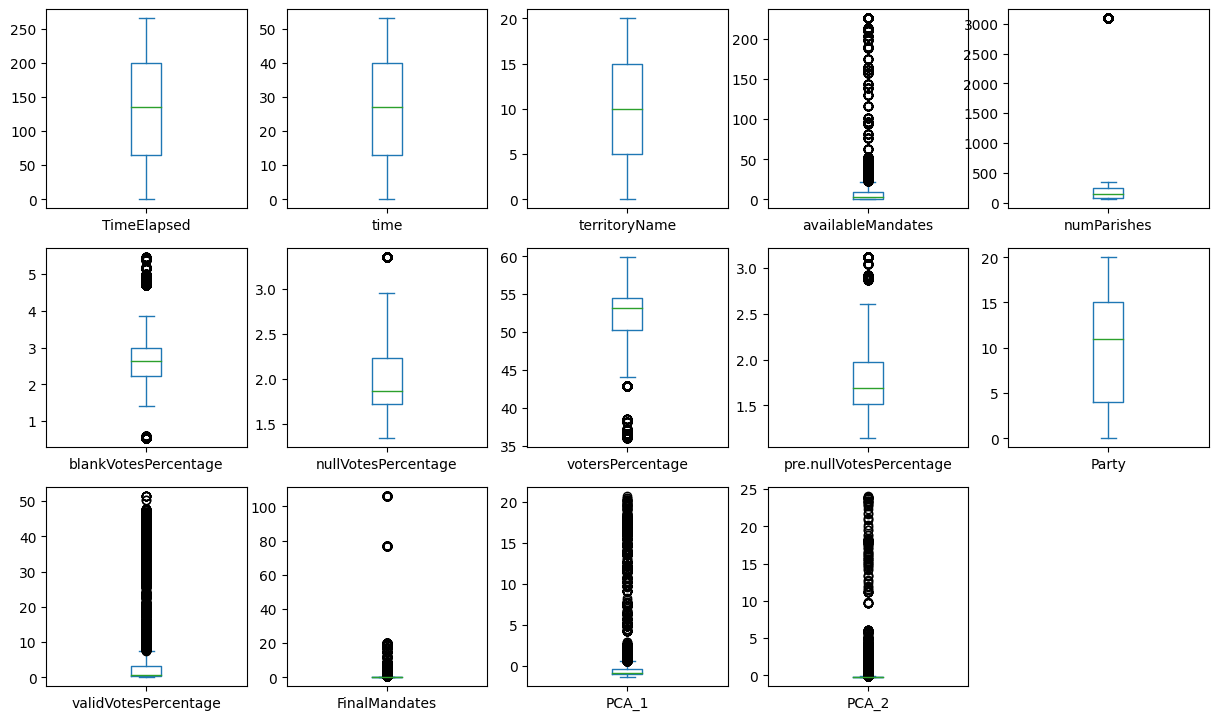

In [23]:
#Agora checando utilizando boxplot
df.plot(kind="box",subplots=True,layout=(5,5),figsize=(15,15))

In [24]:
z = np.abs(zscore(df))

In [25]:
threshold = 3
print(np.where(z<3))
print(df.shape)

(array([    0,     0,     0, ..., 21642, 21642, 21642]), array([ 0,  1,  2, ..., 11, 12, 13]))
(21643, 14)


In [26]:
#Atribua o valor a df_new que é menor que o valor limite e removendo os outliers
filtered_entries= (z < 3).all(axis=1)
df_new = df[filtered_entries]

In [27]:
print(df.shape)
print(df_new.shape)
df_new.tail()

(21643, 14)
(18344, 14)


,TimeElapsed,time,territoryName,availableMandates,numParishes,blankVotesPercentage,nullVotesPercentage,votersPercentage,pre.nullVotesPercentage,Party,validVotesPercentage,FinalMandates,PCA_1,PCA_2
21638,265,53,19,0,277,2.81,2.08,51.04,1.9,9,0.20,0,-0.523330,-0.244401
21639,265,53,19,0,277,2.81,2.08,51.04,1.9,14,0.19,0,-0.523330,-0.244447
21640,265,53,19,0,277,2.81,2.08,51.04,1.9,8,0.15,0,-0.523329,-0.244979
21641,265,53,19,0,277,2.81,2.08,51.04,1.9,18,0.14,0,-0.523329,-0.245108
21642,265,53,19,0,277,2.81,2.08,51.04,1.9,5,0.07,0,-0.523329,-0.246027


In [28]:
#Atribua o valor a df_new que é menor que o valor limite e removendo os outliers
df_new = df[(z<3).all(axis = 1)]
df=df_new

TimeElapsed                   AxesSubplot(0.125,0.747241;0.133621x0.132759)
time                       AxesSubplot(0.285345,0.747241;0.133621x0.132759)
territoryName               AxesSubplot(0.44569,0.747241;0.133621x0.132759)
availableMandates          AxesSubplot(0.606034,0.747241;0.133621x0.132759)
numParishes                AxesSubplot(0.766379,0.747241;0.133621x0.132759)
blankVotesPercentage          AxesSubplot(0.125,0.587931;0.133621x0.132759)
nullVotesPercentage        AxesSubplot(0.285345,0.587931;0.133621x0.132759)
votersPercentage            AxesSubplot(0.44569,0.587931;0.133621x0.132759)
pre.nullVotesPercentage    AxesSubplot(0.606034,0.587931;0.133621x0.132759)
Party                      AxesSubplot(0.766379,0.587931;0.133621x0.132759)
validVotesPercentage          AxesSubplot(0.125,0.428621;0.133621x0.132759)
FinalMandates              AxesSubplot(0.285345,0.428621;0.133621x0.132759)
PCA_1                       AxesSubplot(0.44569,0.428621;0.133621x0.132759)
PCA_2                      AxesSubplot(0.606034,0.428621;0.133621x0.132759)
dtype: object

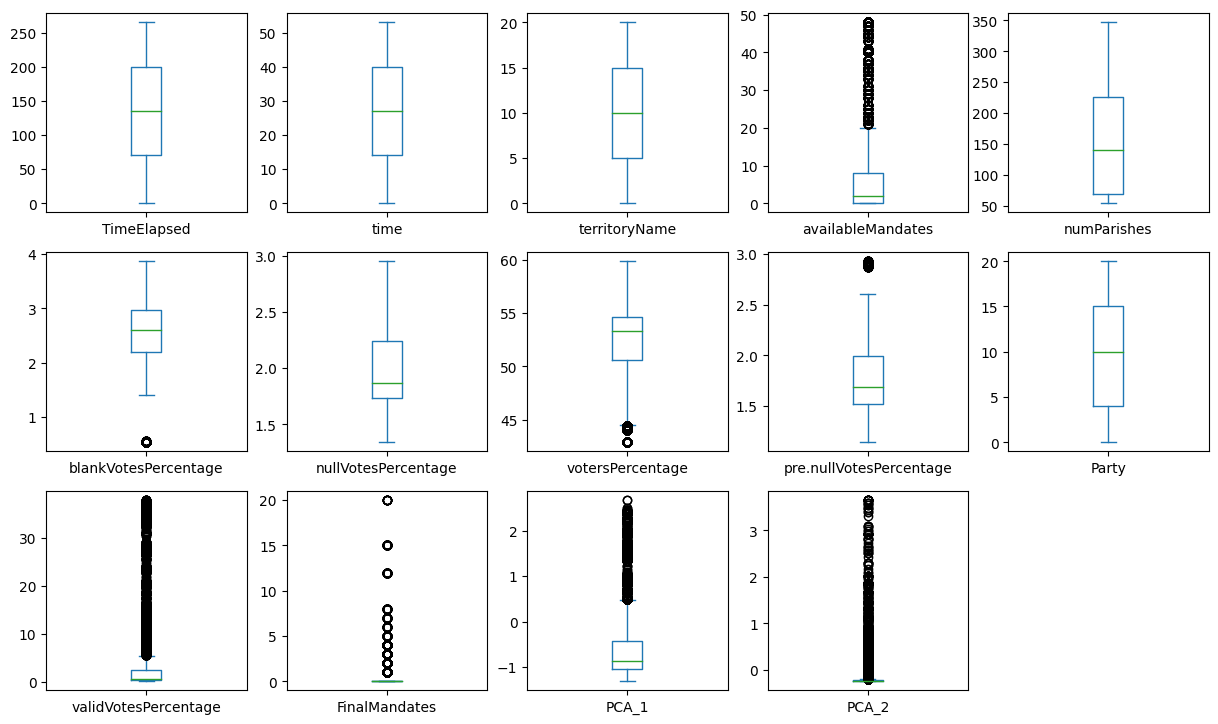

In [29]:
#Agora checando os outliers utilizando o boxplot
df.plot(kind="box",subplots=True,layout=(5,5),figsize=(15,15))

array([[<AxesSubplot: title={'center': 'TimeElapsed'}>,
        <AxesSubplot: title={'center': 'time'}>,
        <AxesSubplot: title={'center': 'territoryName'}>,
        <AxesSubplot: title={'center': 'availableMandates'}>],
       [<AxesSubplot: title={'center': 'numParishes'}>,
        <AxesSubplot: title={'center': 'blankVotesPercentage'}>,
        <AxesSubplot: title={'center': 'nullVotesPercentage'}>,
        <AxesSubplot: title={'center': 'votersPercentage'}>],
       [<AxesSubplot: title={'center': 'pre.nullVotesPercentage'}>,
        <AxesSubplot: title={'center': 'Party'}>,
        <AxesSubplot: title={'center': 'validVotesPercentage'}>,
        <AxesSubplot: title={'center': 'FinalMandates'}>],
       [<AxesSubplot: title={'center': 'PCA_1'}>,
        <AxesSubplot: title={'center': 'PCA_2'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

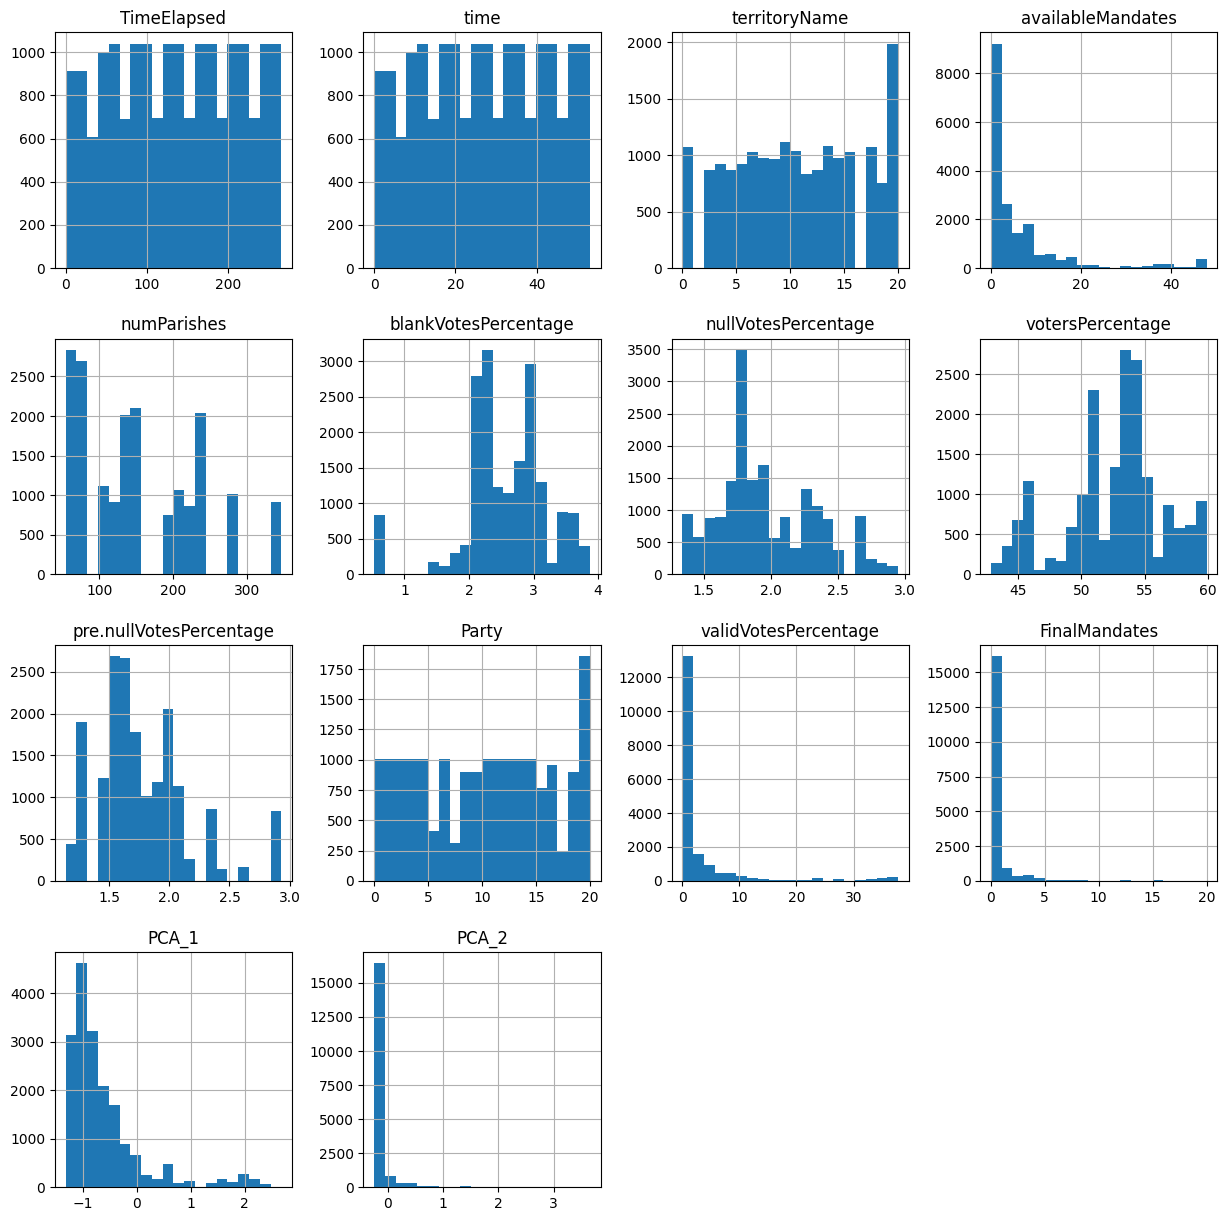

In [31]:
df.hist(figsize=(15,15), layout=(4,4), bins=20)

In [32]:
# Removendo a variável Final Mandate de X
#atribuir o valor de y para treinamento
x = df.drop(columns=['FinalMandates'])
y = df[["FinalMandates"]]

In [33]:
#Padronizando o valor de x usando standardscalar para tornar os dados normalmente distribuídos
sc = StandardScaler()
a = sc.fit_transform(x)
df_x = pd.DataFrame(a,columns=x.columns)
df_x.head()

,TimeElapsed,time,territoryName,availableMandates,numParishes,blankVotesPercentage,nullVotesPercentage,votersPercentage,pre.nullVotesPercentage,Party,validVotesPercentage,PCA_1,PCA_2
0,-1.752388,-1.752388,-1.742046,0.979924,-0.099866,0.540744,-1.043593,0.184517,-0.375381,1.177506,4.579409,-0.934591,2.377776
1,-1.752388,-1.752388,-1.742046,0.979924,-0.099866,0.540744,-1.043593,0.184517,-0.375381,-1.435865,0.637269,-0.934433,0.102026
2,-1.752388,-1.752388,-1.742046,0.979924,-0.099866,0.540744,-1.043593,0.184517,-0.375381,-1.272529,0.442475,-0.934425,0.099888
3,-1.752388,-1.752388,-1.742046,0.979924,-0.099866,0.540744,-1.043593,0.184517,-0.375381,0.197492,-0.108276,-0.934403,-0.278242
4,-1.752388,-1.752388,-1.742046,0.979924,-0.099866,0.540744,-1.043593,0.184517,-0.375381,0.034156,-0.158726,-0.934401,-0.278795


In [35]:
#Dividindo os dados em dados de treinamento e teste
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df_x,y,test_size=0.20,random_state=45)

In [42]:
#definindo uma função para encontrar a pontuação do modelo, pontuação r2 para o conjunto de dados fornecido
model=[LinearRegression(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),Lasso(),Ridge(),ElasticNet(),RandomForestRegressor(),AdaBoostRegressor()]

for m in model:
    m.fit(x_train,y_train)
    score=m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Score of',m,'is:',score)
    print('MAE:',mean_absolute_error(y_test,predm))
    print('MSE:',mean_squared_error(y_test,predm))
    print('RMSE:',np.sqrt(mean_squared_error(y_test,predm)))
    print('R2 score:',r2_score(y_test,predm))
    print('*'*100)
    print('\n')   

Score of LinearRegression() is: 0.9294718059562859
MAE: 0.17146141596345393
MSE: 0.19069932282894678
RMSE: 0.43669133587574965
R2 score: 0.9264717556029701
****************************************************************************************************


Score of SVR() is: 0.9810251864288047
MAE: 0.06961136031871715
MSE: 0.0459501881772782
RMSE: 0.21435995003096592
R2 score: 0.9822829120928814
****************************************************************************************************


Score of DecisionTreeRegressor() is: 1.0
MAE: 0.001635322976287817
MSE: 0.001635322976287817
RMSE: 0.040439126799274694
R2 score: 0.9993694658917252
****************************************************************************************************


Score of KNeighborsRegressor() is: 0.9990470219539075
MAE: 0.00583265194875988
MSE: 0.0024311801580812215
RMSE: 0.04930699907803376
R2 score: 0.9990626059590314
***********************************************************************************

In [45]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=600,max_features='auto',max_depth=5)
rf.fit(x_train,y_train)
print('Score:',rf.score(x_train,y_train))
y_pred_rf=rf.predict(x_test)
print('Mean absolute error:',mean_absolute_error(y_test,y_pred_rf))
print('Mean squared error:',mean_squared_error(y_test,y_pred_rf))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,y_pred_rf)))
print('R2 score:',r2_score(y_test,y_pred_rf))

Score: 0.9942216880722232
Mean absolute error: 0.02487674421026223
Mean squared error: 0.012952010639517127
Root Mean Squared Error: 0.11380690066738978
R2 score: 0.9950060724411194


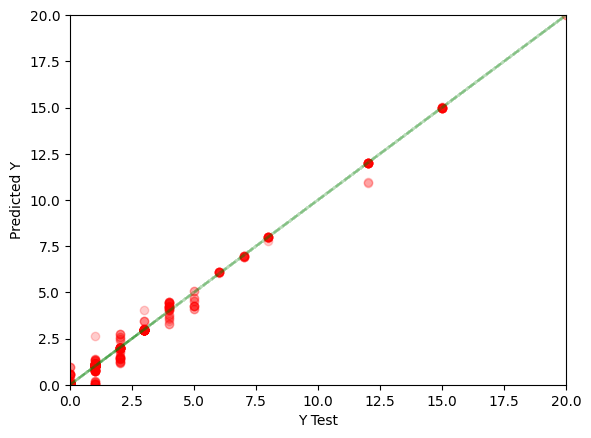

In [46]:
plt.scatter(x=y_test,y=y_pred_rf,marker= "o",color="red",alpha=0.2)
plt.plot(x,x,"g--",alpha=0.1)
plt.xlim(0,20)
plt.ylim(0,20)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')